In [1]:
#Hanfei Geng #hgeng4


In [3]:
import numpy as np
import scipy
from scipy import signal,io
import matplotlib.pyplot as plt

In [4]:
rawDict = {}
rawDict['data'] = scipy.io.loadmat('videoData.mat')
data = rawDict['data']['videodata']
red_frame_average = np.zeros(300)

In [8]:
x = np.array(data)
for i in range(300):
    totalred = np.sum(x[:,:,0,i])
    red_frame_average[i] = totalred*1.0/(401*401)

around 10 peaks in 300 frames
estmiated heart rate 60 bpm
range 6.14085733298


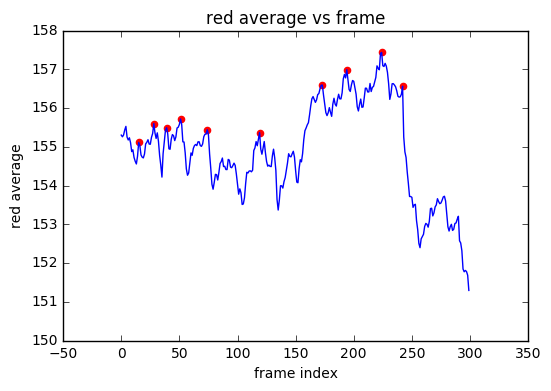

In [9]:
def peak_detection(t,sigs,dt=5,thresh=155):
    peaks = []
    N = len(sigs)

    for i in range(dt,N-dt-1):
        left_neighbor = sigs[i-dt:i+1]
        right_neighbor = sigs[i:i+dt+1]
        if max(left_neighbor) == sigs[i] and max(right_neighbor) == sigs[i] and sigs[i] >= thresh:
            peaks.append((t[i],sigs[i]))

    return np.array(peaks)

max_peaks = peak_detection(range(300), red_frame_average)

plt.scatter(max_peaks[:,0], max_peaks[:,1], color = 'red')
plt.plot(red_frame_average)

plt.title("red average vs frame")
plt.xlabel("frame index")
plt.ylabel("red average")
print("around 10 peaks in 300 frames")
print("estmiated heart rate 60 bpm")
print("range "+str(max(red_frame_average)-min(red_frame_average)))
plt.show()